In [1]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt


font_path = 'C:/Windows/Fonts/H2GTRM.TTF'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)

In [2]:
os.chdir("C://Users//BIS_COM//data//project//부동산")

In [3]:
seoul_df = pd.read_csv(r'./1.서울아파트매매.csv', encoding='cp949', parse_dates=['계약년월'])
busan_df = pd.read_csv(r'./2.부산아파트매매.csv', encoding='cp949')
daegu_df = pd.read_csv(r'./3.대구아파트매매.csv', encoding='cp949')
incheon_df = pd.read_csv(r'./4.인천아파트매매.csv', encoding='cp949')
daejeon_df = pd.read_csv(r'./5.대전아파트매매.csv', encoding='cp949')
sejong_df = pd.read_csv(r'./6.세종아파트매매.csv', encoding='cp949')
gg_df = pd.read_csv(r'./7.경기아파트매매.csv', encoding='cp949')
chong_df = pd.read_csv(r'./8.충북아파트매매.csv', encoding='cp949')

C:\Users\BIS_COM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\BIS_COM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
seoul_df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201703,15,"80,000",7,1988,언주로 103
1,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201704,19,"85,000",2,1988,언주로 103
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,201707,8,"89,900",1,1988,언주로 103
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201704,13,"97,500",4,1987,언주로 3
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,201704,17,"98,000",1,1987,언주로 3


In [5]:
df_list = [seoul_df, busan_df, daegu_df, incheon_df, daejeon_df, sejong_df, gg_df, chong_df]

In [6]:
for i in df_list:
    i["거래금액(만원)"] = i["거래금액(만원)"].str.replace(pat=",", repl="", regex=False)
    i['거래금액(만원)'] = pd.to_numeric(i['거래금액(만원)'])

In [7]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345678 entries, 0 to 345677
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구       345678 non-null  object 
 1   번지        345452 non-null  object 
 2   본번        345624 non-null  float64
 3   부번        345624 non-null  float64
 4   단지명       345678 non-null  object 
 5   전용면적(㎡)   345678 non-null  float64
 6   계약년월      345678 non-null  object 
 7   계약일       345678 non-null  int64  
 8   거래금액(만원)  345678 non-null  int64  
 9   층         345678 non-null  int64  
 10  건축년도      345678 non-null  int64  
 11  도로명       345678 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 31.6+ MB


# 규제지역 중 투기과열지구
서울 전지역(17. 8. 3)

경기 과천(17.8.3), 성남분당(17.9.6), 광명,하남(18.8.28), 수원, 성남수정, 안양, 안산        단원, 구리, 군포, 의왕, 용인수지·기흥, 동탄2(20.6.19)

인천 연수, 남동, 서(20.6.19)

대전 동, 중, 서, 유성 (20. 6. 19)

부산 -

대구 수성(17.9.6

세종 세종(17.8.3)

충북

# - seoul (N=25)

In [8]:
gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
           '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
           '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [9]:
price_mean_df = seoul_df.groupby(["계약년월", "시군구"])[
    '거래금액(만원)'].mean().reset_index()
price_count_df = seoul_df.groupby(["계약년월", "시군구"])[
    '거래금액(만원)'].count().reset_index()
price_count_df.head()

,계약년월,시군구,거래금액(만원)
0,201701,서울특별시 강남구 개포동,38
1,201701,서울특별시 강남구 논현동,8
2,201701,서울특별시 강남구 대치동,42
3,201701,서울특별시 강남구 도곡동,21
4,201701,서울특별시 강남구 삼성동,17


In [10]:
seoul_gu_df = price_mean_df.loc[price_mean_df['시군구']. str.contains(gu_list[0])]
seoul_gu_df.head()

,계약년월,시군구,거래금액(만원)
0,201701,서울특별시 강남구 개포동,97842.105263
1,201701,서울특별시 강남구 논현동,62887.500000
2,201701,서울특별시 강남구 대치동,127923.809524
3,201701,서울특별시 강남구 도곡동,135380.952381
4,201701,서울특별시 강남구 삼성동,146870.588235


In [11]:
for i in gu_list:
    a = price_mean_df.loc[price_mean_df['시군구']. str.contains(i)]
    globals()['df_mean_{}'.format(i)] = a.groupby(
        ['계약년월'])['거래금액(만원)'].mean().reset_index()

In [12]:
for i in gu_list:
    a = price_count_df.loc[price_count_df['시군구']. str.contains(i)]
    globals()['df_count_{}'.format(i)] = a.groupby(
        ['계약년월'])['거래금액(만원)'].count().reset_index()

In [13]:
df_mean_강남구.head()

,계약년월,거래금액(만원)
0,201701,111279.933110
1,201702,112683.689556
2,201703,112723.814843
3,201704,116901.754496
4,201705,112558.519892


In [14]:
df_count_강남구.head()

,계약년월,거래금액(만원)
0,201701,13
1,201702,13
2,201703,13
3,201704,13
4,201705,13


In [15]:
df_list = []

for i in gu_list:
    a = price_mean_df.loc[price_mean_df['시군구']. str.contains(i)]
    globals()['df_mean_{}'.format(i)] = a.groupby(
        ['계약년월'])['거래금액(만원)'].mean().reset_index()

    # 생성된 DF 변수명들을 LIST에 추가
    b = 'df_mean_{}'.format(i)
    df_list.append(b)

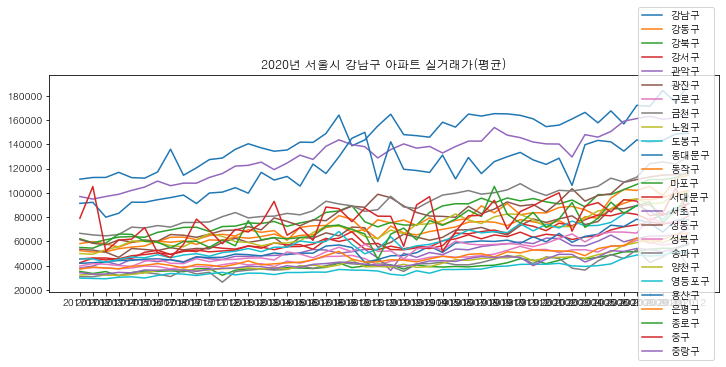

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_title('2020년 서울시 강남구 아파트 실거래가(평균)')

for i in gu_list:
    a = globals()['df_mean_{}'.format(i)]
    ax.plot(a["계약년월"], a["거래금액(만원)"], label=i)

ax.legend(loc="center right")
plt.show()

NameError: name 'j' is not defined

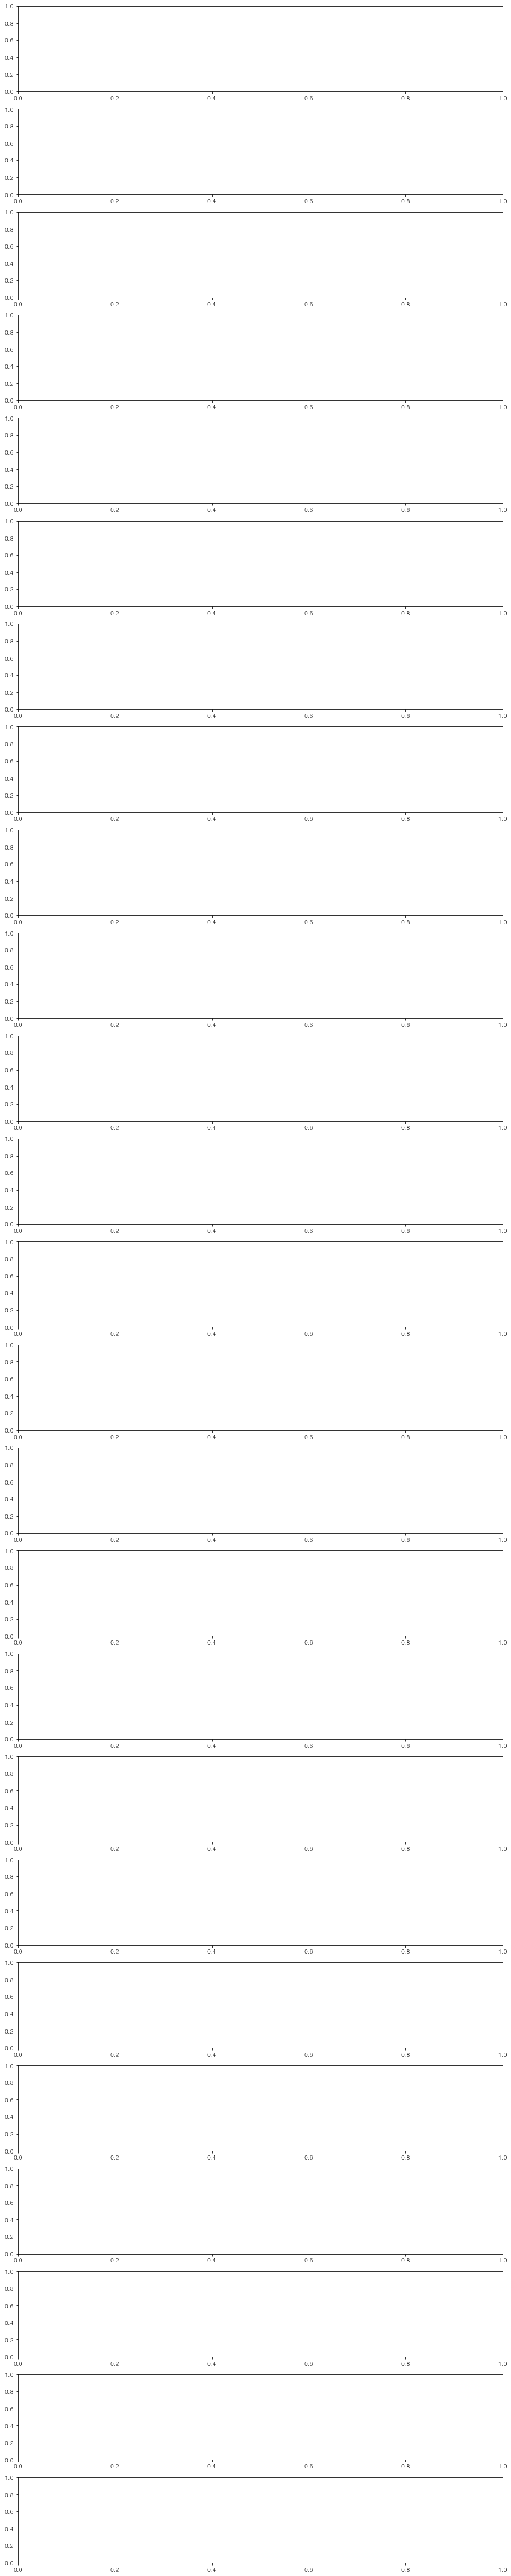

In [17]:
fig, axes = plt.subplots(25, 1, figsize=(12, 60))
plt.tight_layout()
for i in range(25):
    a = globals()['{}'.format(df_list[i])]
    b = globals()['df_count_{}'.format(j)]
    axes[i].set_title('서울시_{}'.format(j))
    axes[i].plot(a['계약년월'], a['거래금액(만원)'])
    axes[i].bar(b['계약년월'],b['거래금액(만원)'])
# for i in gu_list:
#     a = globals()['df_mean_{}'.format(i)]
#     ax.plot(a["계약년월"], a["거래금액(만원)"], label=i)

# ax.legend(loc="center right")
plt.show()

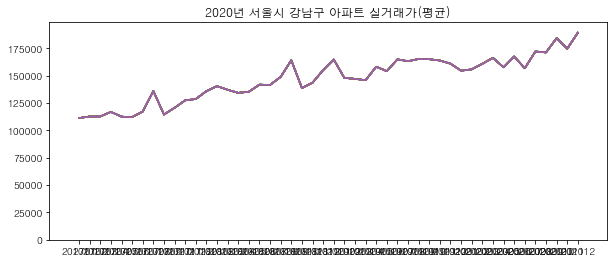

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_title('2020년 서울시 강남구 아파트 실거래가(평균)')
for i in gu_list:
    ax.plot(df_mean_강남구['계약년월'], df_mean_강남구['거래금액(만원)'])
    ax.bar(df_count_강남구['계약년월'], df_count_강남구['거래금액(만원)'])

plt.show()

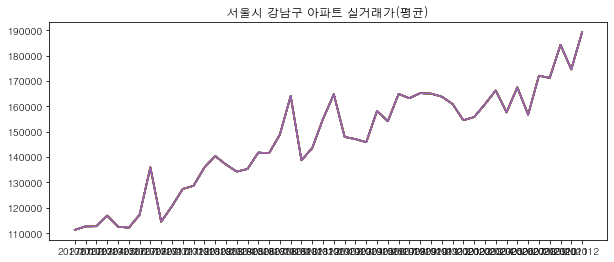

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_title('서울시 강남구 아파트 실거래가(평균)')
for i in gu_list:
    ax.plot(df_mean_강남구['계약년월'], df_mean_강남구['거래금액(만원)'])

plt.show()

In [45]:
def Price_line_plot (data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(14, 7), dpi=200)
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.plot(data['계약년월'], data['거래금액(만원)'])

    color =  ['green', 'red']
    span_range = [[0, 7],[8, len(data['계약년월'])]]

    for idx, sub_title in enumerate(['비 규제기간', '규제기간']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.07)
    ax.set_title(f'서울시 {title} 아파트 실거래가 (평균)', fontsize=15, fontweight='bold', position=(0.20, 1.0+0.03))
    plt.show()

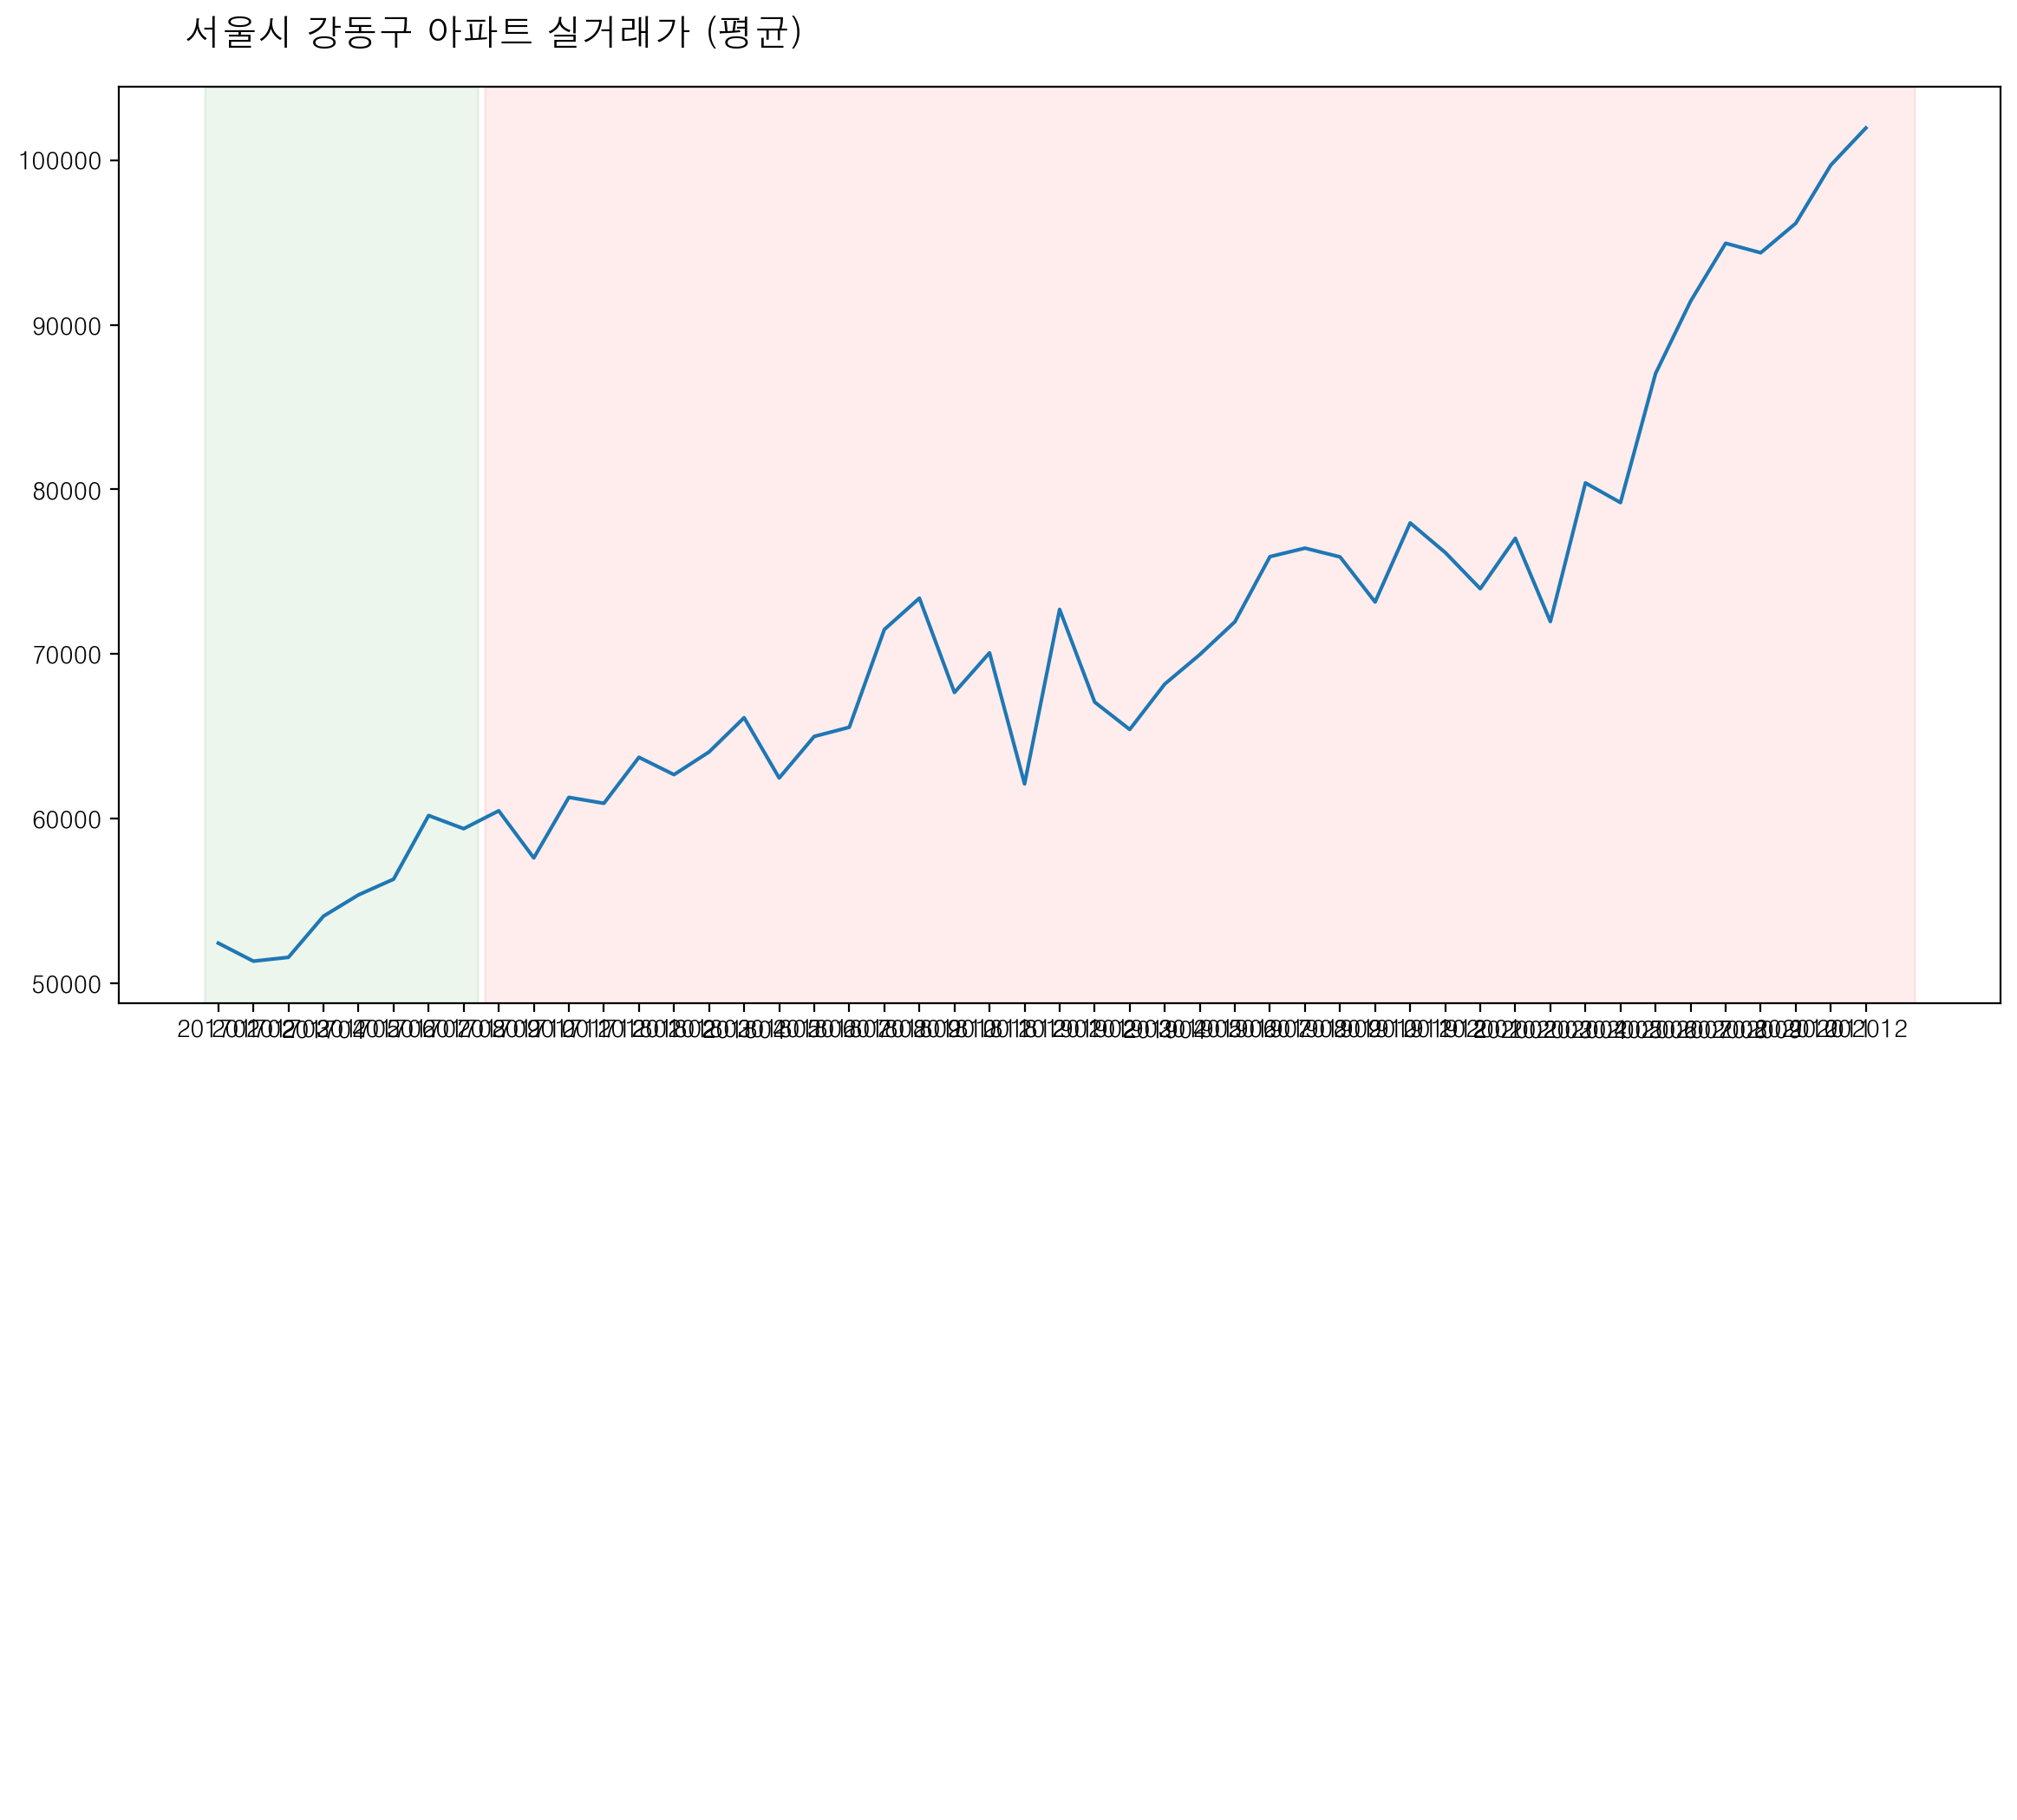

In [52]:
Price_line_plot(df_mean_강동구,'강동구',1200)

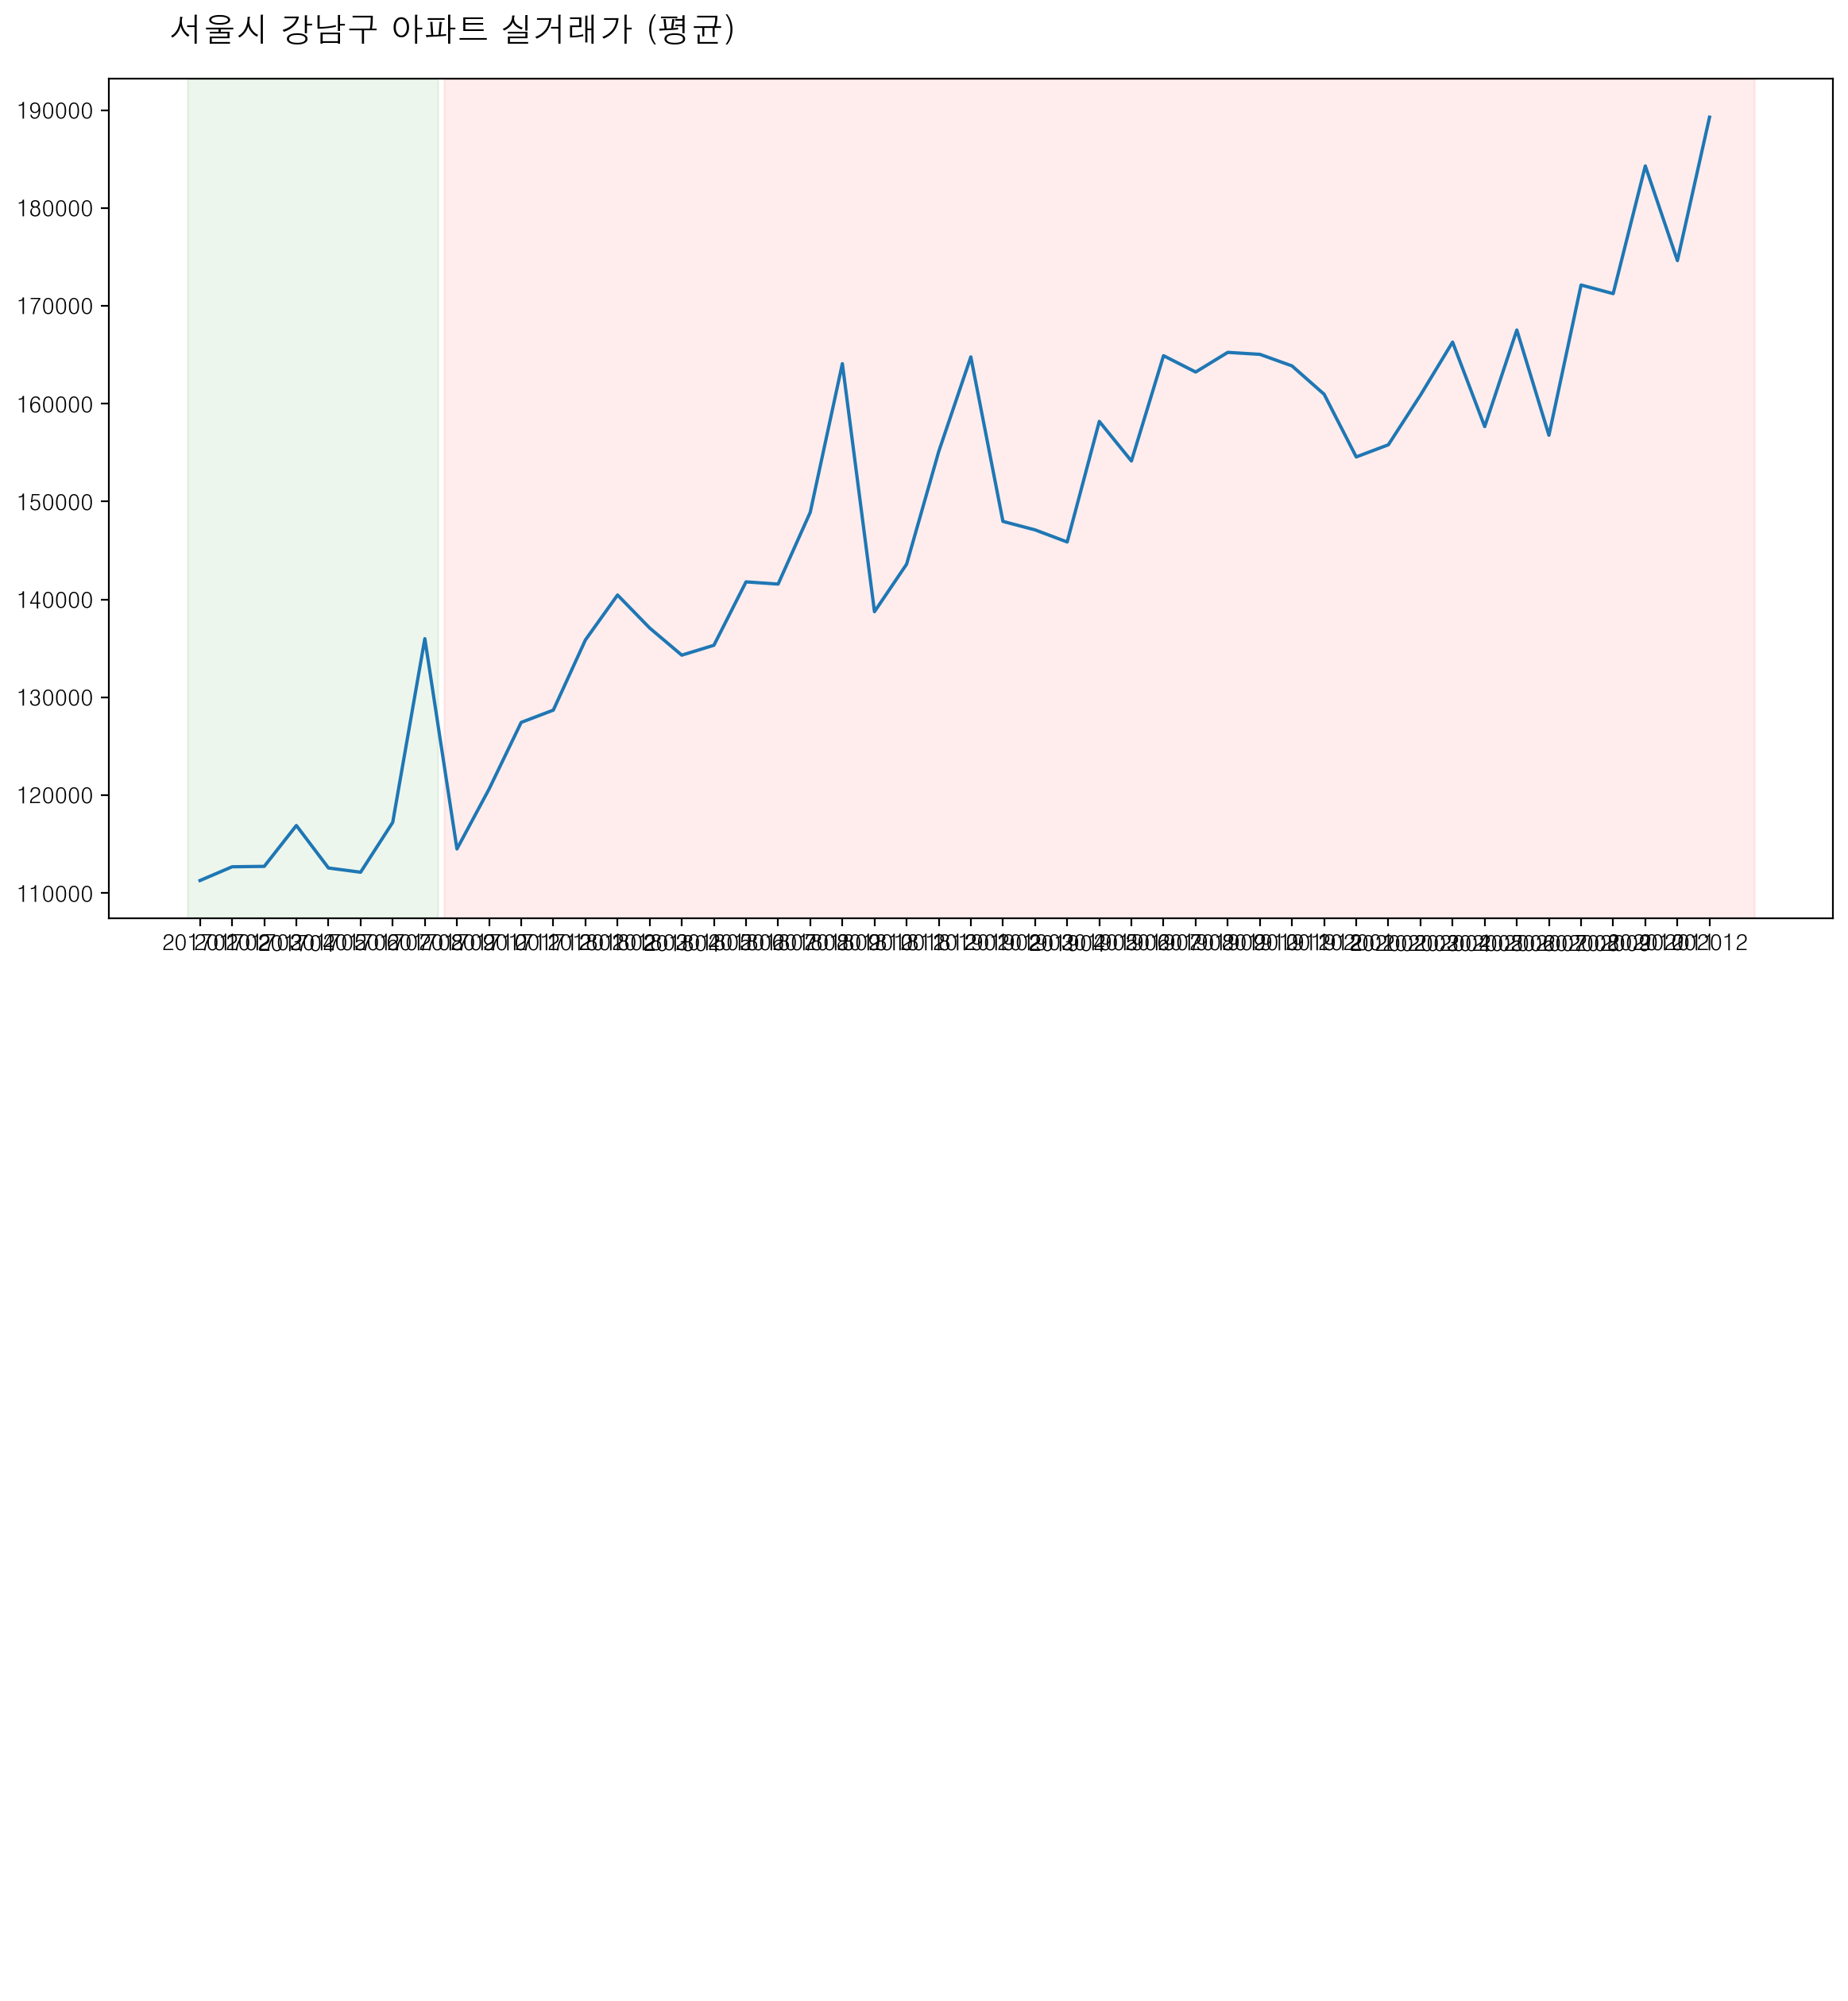

In [51]:
Price_line_plot(df_mean_강남구, '강남구',1)

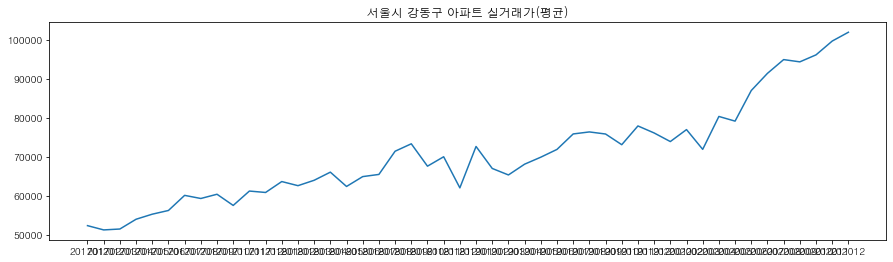

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.set_title('서울시 강동구 아파트 실거래가(평균)')
ax.plot(df_mean_강동구['계약년월'], df_mean_강동구['거래금액(만원)'])

plt.show()

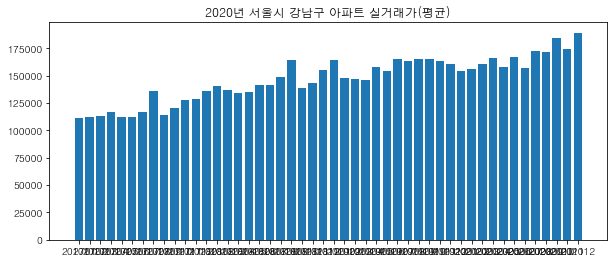

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.set_title('2020년 서울시 강남구 아파트 실거래가(평균)')
ax.bar(df_mean_강남구['계약년월'], df_mean_강남구['거래금액(만원)'])

plt.show()

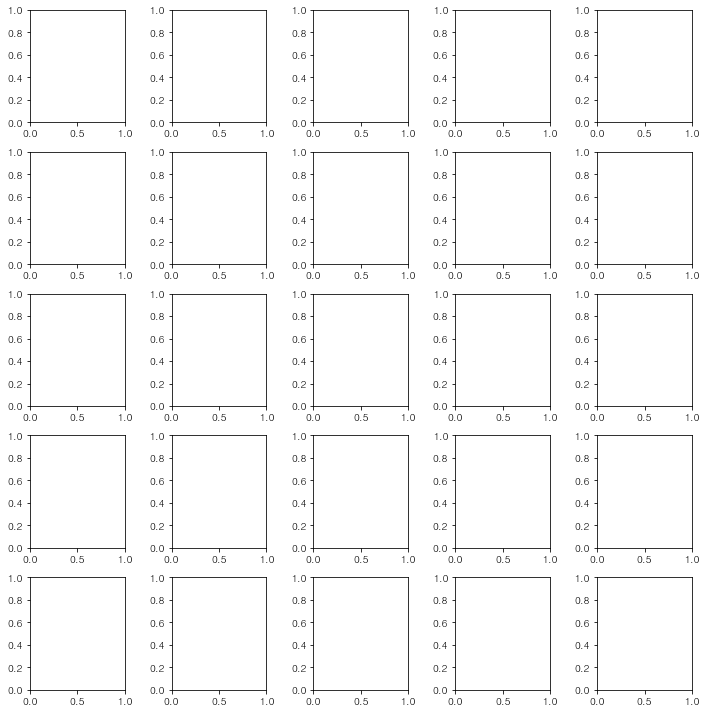

In [22]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
plt.tight_layout()
plt.show()

# 규제지역 중 조정대상지역

서울 전 지역(16.11.3)

경기 과천, 성남, 하남, 동탄2(16.11.3), 광명(17.6.19), 구리, 안양동안, 광교지구(18.8.28), 수원팔달, 용인수지‧기흥(8.12.31), 수원영통·권선·장안, 안양만안, 의왕(20.2.21), 고양, 남양주, 화성, 군포, 안성, 부천, 안산, 시흥, 용인처인, 오산, 평택, 광주, 양주, 의정부(20.6.19), 김포(20.11.20)

인천 동, 중, 서, 유성, 대덕(20.6.19)

부산 해운대, 수영, 동래, 남, 연제(’20.11.20)

대구 수성(20.11.20)

충북 청주(20.6.19)